In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [2]:
import os.path

def load_csv_file(filepath):

    if not os.path.isfile(filepath):
        print("Nie odnaleziono pliku!")
        return None
    elif filepath[-4:] != ".csv":
        print("Błędne rozszerzenie pliku!")
        return None
    else:
        print("Znaleziono plik!")
        return load_data_from_csv(filepath)

def load_data_from_csv(filepath):

    headers = ['Sex', 'Length', 'Diameter',
                'Height', 'Whole weight',
                'Shucked weight', 'Viscera weight',
                'Shell weight', 'Rings']

    types = {'Sex':str, 'Length':np.float32,
             'Diameter':np.float32, 'Height':np.float32,
             'Whole weight':np.float32, 'Shucked weight':np.float32,
             'Viscera weight':np.float32, 'Shell weight':np.float32,
             'Rings':np.uint8}

    data_container = pd.read_csv(filepath, header=None, names=headers, dtype=types)

    return data_container

In [3]:
data = load_csv_file('data/data.csv')

Znaleziono plik!


In [4]:
first_table = data.groupby('Sex')['Sex'].agg(['count'])
first_table['%'] = 100 * first_table['count'] / first_table['count'].sum()
first_table = first_table.rename(index={'F': 'Female', 'I': 'Infant', 'M': 'Male'})
first_table.index.name = None

print(first_table)

        count          %
Female   1307  31.290400
Infant   1342  32.128322
Male     1528  36.581278


In [5]:
second_table = data.describe().transpose()
del second_table['count']
print(second_table)

                    mean       std     min     25%     50%     75%      max
Length          0.523992  0.120093  0.0750  0.4500  0.5450   0.615   0.8150
Diameter        0.407881  0.099240  0.0550  0.3500  0.4250   0.480   0.6500
Height          0.139516  0.041827  0.0000  0.1150  0.1400   0.165   1.1300
Whole weight    0.828742  0.490389  0.0020  0.4415  0.7995   1.153   2.8255
Shucked weight  0.359367  0.221963  0.0010  0.1860  0.3360   0.502   1.4880
Viscera weight  0.180594  0.109614  0.0005  0.0935  0.1710   0.253   0.7600
Shell weight    0.238831  0.139203  0.0015  0.1300  0.2340   0.329   1.0050
Rings           9.933684  3.224169  1.0000  8.0000  9.0000  11.000  29.0000


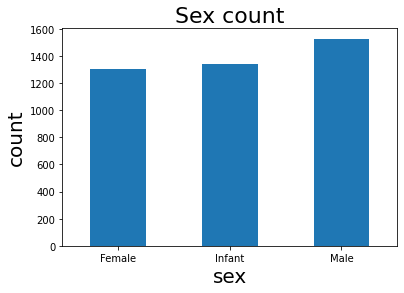

In [6]:
plot = first_table['count'].plot.bar(rot=0)
plot.set_title("Sex count", fontdict={'fontsize': 22})
plot.set_xlabel("sex", fontdict={'fontsize': 20})
plot.set_ylabel("count", fontdict={'fontsize': 20})
plt.show()

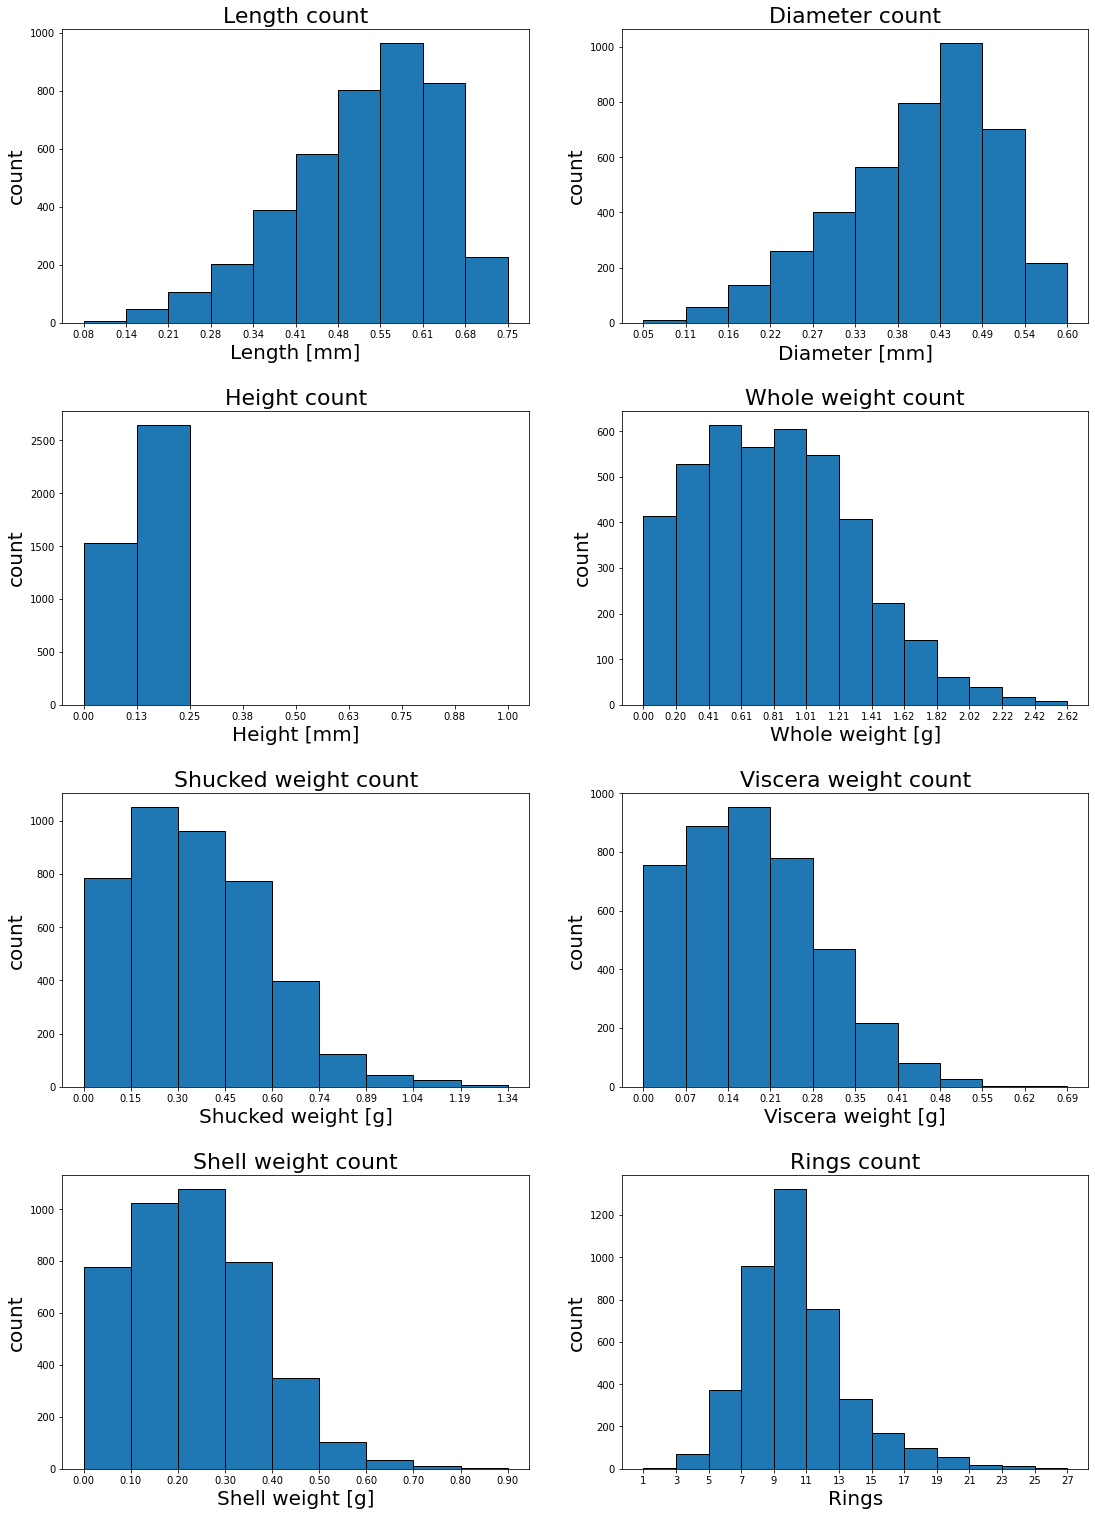

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.subplots_adjust(left=None, bottom=0, right=2.5, top=5, wspace=None,
                    hspace=0.3)
hist_counts = [11, 11, 9, 14, 10, 11, 10, 14]
measures = ['mm', 'mm', 'mm', 'g', 'g', 'g', 'g']
columns = iter(data)
next(columns)
i = 0

for column in columns:
    min_val, max_val = min(data[column].values), max(data[column].values)
    dif = np.arange(min_val, max_val, (max_val - min_val) / hist_counts[i])
    plot = data[column].plot.hist(ax=axes[i // 2, i % 2], edgecolor='black',
                                 linewidth=1, align='mid', bins=dif)

    ax = axes[i // 2, i % 2]
    ax.set_xticks(dif)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f' if i < len(measures) else '%i'))

    plot.set_title(column + ' count', fontdict={'fontsize': 22})

    xlabel = column + ' [' + measures[i] + ']' if i < len(measures) else column
    plot.set_xlabel(xlabel, fontdict={'fontsize': 20})
    plot.set_ylabel('count', fontdict={'fontsize': 20})

    i += 1

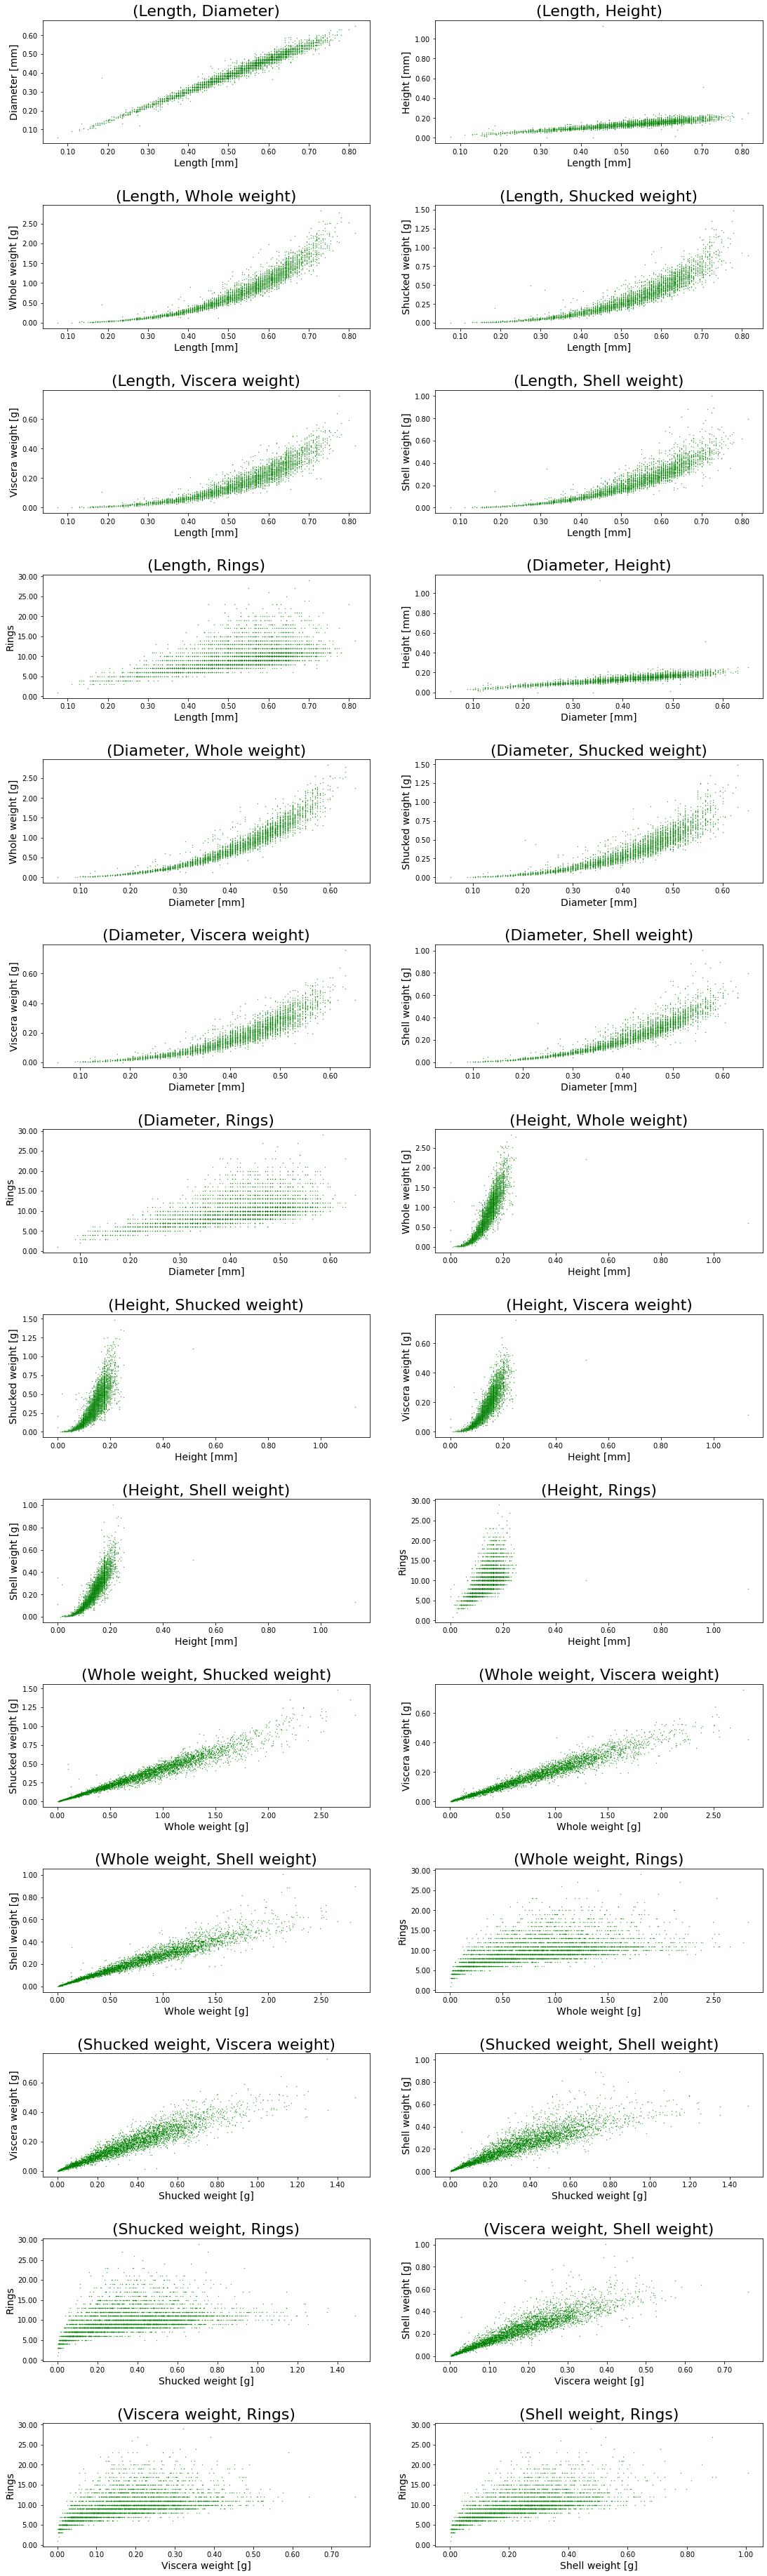

In [8]:
fig2, axes2 = plt.subplots(nrows=14, ncols=2)
fig2.subplots_adjust(left=None, bottom=0, right=2.5, top=5, wspace=None,
                    hspace=0.5)
fig2.set_figheight(10)

measures_dict = {'Length': 'mm', 'Diameter': 'mm',
                'Height': 'mm', 'Whole weight': 'g',
                'Shucked weight': 'g', 'Viscera weight': 'g',
                'Shell weight': 'g'}

quantitative_features = ['Length', 'Diameter',
                         'Height', 'Whole weight',
                         'Shucked weight', 'Viscera weight',
                         'Shell weight', 'Rings']

i = 0
j = 0

for feature1 in quantitative_features:
    j += 1
    _x=data[feature1]
    for feature2 in quantitative_features[j:]:
        _y=data[feature2]
        ax = axes2[i // 2, i % 2]
        ax.scatter(x=_x, y=_y, s=0.1, c='g')

        ax.set_title('(' + feature1 + ', ' + feature2 + ')', fontdict={'fontsize': 22})

        xlabel = feature1 + ' [' + measures_dict[feature1] + ']' if feature1 != 'Rings' else feature1
        ylabel = feature2 + ' [' + measures_dict[feature2] + ']' if feature2 != 'Rings' else feature2

        ax.set_xlabel(xlabel, fontdict={'fontsize': 14})
        ax.set_ylabel(ylabel, fontdict={'fontsize': 14})

        ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f' if feature1 != 'Rings' else '%i'))
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f' if feature1 != 'Rings' else '%i'))
#         plot.set_xlim([_x.quantile(.15), _x.quantile(.85)])
#         plot.set_ylim([_y.quantile(.15), _y.quantile(.85)])
        i += 1

In [9]:
df = data
# del df['Sex']
corr_matrix = df.corr()
print(corr_matrix)

                  Length  Diameter    Height  Whole weight  Shucked weight  \
Length          1.000000  0.986812  0.827554      0.925261        0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
Height          0.827554  0.833684  1.000000      0.819221        0.774972   
Whole weight    0.925261  0.925452  0.819221      1.000000        0.969405   
Shucked weight  0.897914  0.893162  0.774972      0.969405        1.000000   
Viscera weight  0.903018  0.899724  0.798319      0.966375        0.931961   
Shell weight    0.897706  0.905330  0.817338      0.955355        0.882617   
Rings           0.556720  0.574660  0.557467      0.540390        0.420884   

                Viscera weight  Shell weight     Rings  
Length                0.903018      0.897706  0.556720  
Diameter              0.899724      0.905330  0.574660  
Height                0.798319      0.817338  0.557467  
Whole weight          0.966375      0.955355  0.540390  
Shucked weig

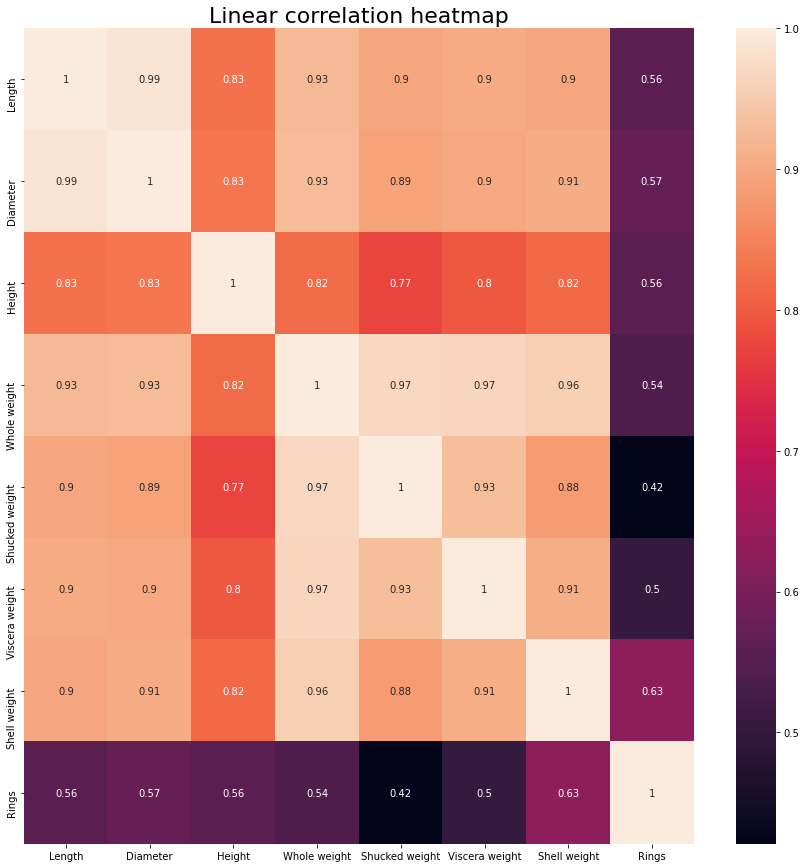

In [10]:
fig3, axes3 = plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, ax=axes3)
axes3.set_title('Linear correlation heatmap', fontdict={'fontsize': 22})
plt.show()

Length          Length            1.000000
Diameter        Length            0.986812
Shucked weight  Whole weight      0.969405
Viscera weight  Whole weight      0.966375
Whole weight    Shell weight      0.955355
Viscera weight  Shucked weight    0.931961
Whole weight    Diameter          0.925452
Length          Whole weight      0.925261
Viscera weight  Shell weight      0.907656
Shell weight    Diameter          0.905330
Length          Viscera weight    0.903018
Viscera weight  Diameter          0.899724
Length          Shucked weight    0.897914
                Shell weight      0.897706
Shucked weight  Diameter          0.893162
Shell weight    Shucked weight    0.882617
Diameter        Height            0.833684
Height          Length            0.827554
                Whole weight      0.819221
                Shell weight      0.817338
                Viscera weight    0.798319
Shucked weight  Height            0.774972
Rings           Shell weight      0.627574
           

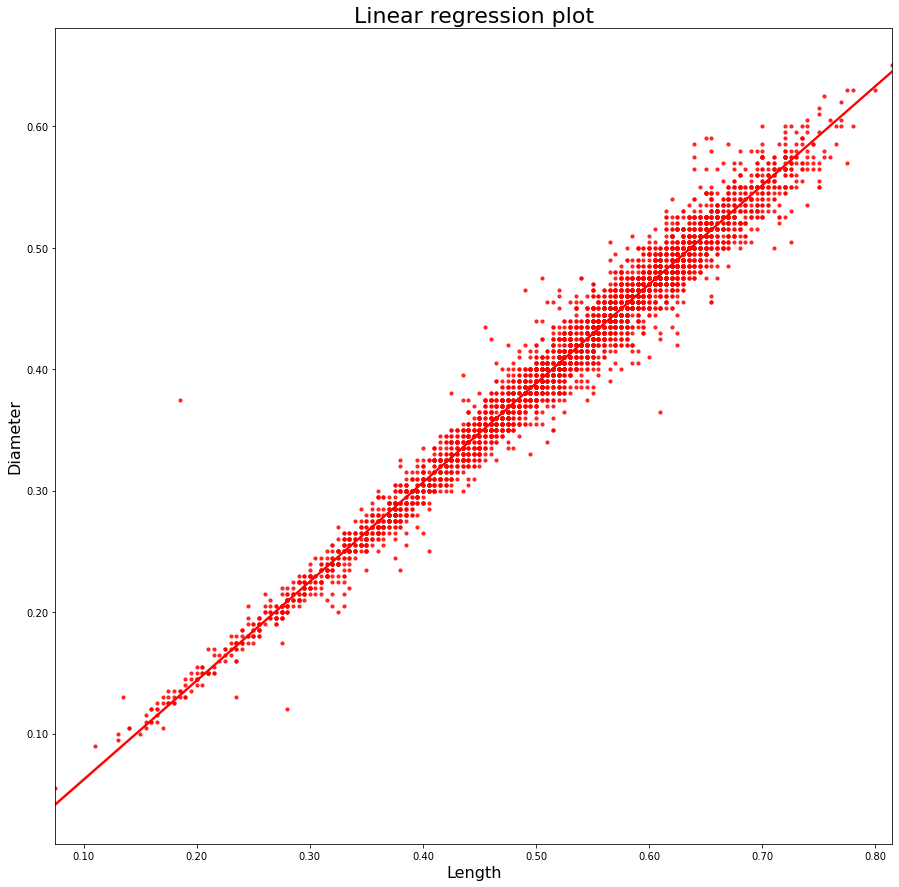

In [11]:
# max_value = corr_matrix[corr_matrix < 1.0].max().max()
print(corr_matrix.unstack().sort_values(ascending=False).drop_duplicates())
subframe = data[['Length', 'Diameter']]

fig4, axes4 = plt.subplots(figsize=(15,15))
sns.regplot(x='Length', y='Diameter', data=subframe, ax=axes4, color='red', scatter_kws={'s':10})

axes4.set_title('Linear regression plot', fontdict={'fontsize': 22})

axes4.set_xlabel('Length', fontdict={'fontsize': 16})
axes4.set_ylabel('Diameter', fontdict={'fontsize': 16})

axes4.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axes4.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.show()

In [12]:
# print(data.groupby(by='Sex'))
# print('test')
# fourth_table = data.describe().transpose()
# # print(fourth_table)
# del fourth_table['count']
# # print(fourth_table)
# # print(fourth_table.unstack())
# fifth_table = data.describe().transpose()
# del fifth_table['count']
# print(fifth_table.transpose().unstack(level=-1))
# print(data.groupby(['Length', 'Diameter', 'Shucked weight']).describe())
df = data.replace({'Sex': {'M': 'Male', 'F': 'Female', 'I': 'Infant'}})
df = df.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']].mean()

print(df.unstack())

                Sex   
Length          Female     0.579093
                Infant     0.427746
                Male       0.561391
Diameter        Female     0.454732
                Infant     0.326494
                Male       0.439287
Height          Female     0.158011
                Infant     0.107996
                Male       0.151381
Whole weight    Female     1.046532
                Infant     0.431363
                Male       0.991459
Shucked weight  Female     0.446188
                Infant     0.191035
                Male       0.432946
Viscera weight  Female     0.230689
                Infant     0.092010
                Male       0.215545
Shell weight    Female     0.302010
                Infant     0.128182
                Male       0.281969
Rings           Female    11.129304
                Infant     7.890462
                Male      10.705497
dtype: float64


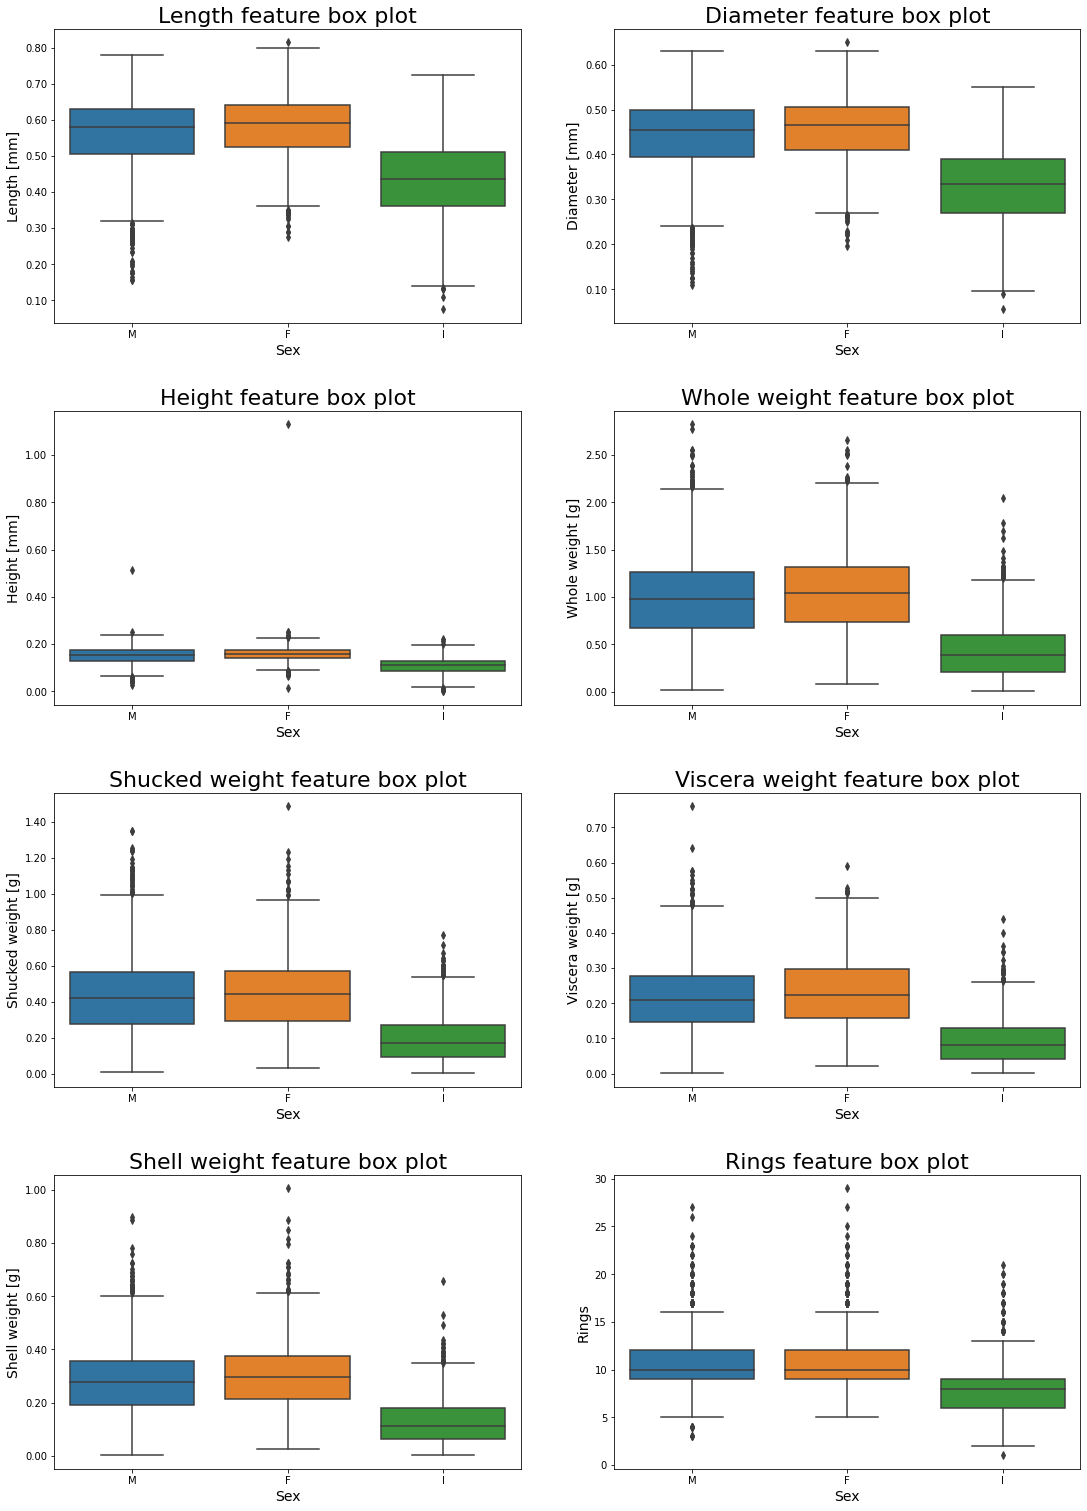

In [13]:
fig5, axes5 = plt.subplots(nrows=4, ncols=2)
fig5.subplots_adjust(left=None, bottom=0, right=2.5, top=5, wspace=None,
                    hspace=0.3)

i = 0

for feature in quantitative_features:
    ax = axes5[i // 2, i % 2]
    sns.boxplot(data=data, x='Sex', y=feature, ax=ax)
    ax.set_title(feature + ' feature box plot', fontdict={'fontsize': 22})

    ylabel = feature + ' [' + measures_dict[feature] + ']' if feature != 'Rings' else feature

    ax.set_xlabel('Sex', fontdict={'fontsize': 14})
    ax.set_ylabel(ylabel, fontdict={'fontsize': 14})

    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f' if feature != 'Rings' else '%i'))

    i += 1